# Test the distributions of the Ratios Between Height and Width in German and French Styles

In this notebook, we test the distributions of the height-to-width ratios for 5 letters in Ashkenazic Ancient Hebrew, specifically in the German and French modes.

The letters are:
* Aleph (א)
* Shin (ש)
* He (ה)
* Mem (מ)
* Tav (ת)
* Mem Sofit (ם)

Note: Letters stretched to justify the end of a line are excluded from this analysis.

In [16]:
# Define the categories
CATEGORIES = [
    {"id": 1, "name": "Aleph"},
    {"id": 2, "name": "He"},
    {"id": 3, "name": "Mem"},
    {"id": 4, "name": "Shin"},
    {"id": 5, "name": "Mem Sofit"},
    {"id": 6, "name": "Tav"}
]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


GEt the annotation boxes of the selected category id.

In [18]:
import os
import json

def belong_to_script_mode(image_id, script_mode_ids):
    return (image_id // 100) in script_mode_ids

def get_boxes(file_path, category_id, script_mode_ids):
    # Check if the directory exists
    if not os.path.isfile(file_path):
        raise ValueError(f"The path {file_path} is not a valid file.")

    bboxes = []
    # Open and read the JSON file
    with open(file_path, 'r') as file:
        annotation_data = json.load(file)
    # Extract bounding boxes from annotations
    bboxes.extend([
        ann["bbox"]
        for ann in annotation_data["annotations"]
        if ann["category_id"] == category_id and belong_to_script_mode(ann["image_id"], script_mode_ids)
    ])

    return bboxes


Calculate ratios between hight and width of the boxes we've obtained.

In [19]:
def calculate_ratios(boxes):
    return [box[3] / box[2] for box in boxes]  # box[3] is height, box[2] is width


In [20]:
annotations_path = "annotations.json"
french_ids = [
    2,
    3,
    8,
    16,
    20,
    29,
    39,
    46,
    48,
    55,
    56
]

german_ids = [
    4,
    6,
    7,
    12,
    13,
    17,
    22,
    24,
    27,
    28,
    30,
    33,
    34,
    35,
    36,
    40,
    54,
    58
]

We will calculate the following for each letter:

* The height-to-width ratio values of the bounding box of the letter.
* Visualization of the distribution of these ratios across French and German styles.
* Mean, standard deviation, and the sample size.
* Q-Q visualization to compare the distributions to a normal distribution, as a prerequisite for performing the T-test.
* Levene's test to check for variance equality. If the variances are equal, use the T-test; otherwise, use Welch's T-test.
* Perform the T-test to determine whether the distributions are significantly different.

## The Aleph Letter

* Name: Aleph (א)
* Category id: 1

In [7]:
category_id = 1
category_name = CATEGORIES[category_id - 1]


In [8]:
# Get the boxes of Aleph for Both German and French
boxes_french = get_boxes(annotations_path, category_id, french_ids)
boxes_german = get_boxes(annotations_path, category_id, german_ids)

# Calculate the ratios for each style
ratios_french = calculate_ratios(boxes_french)
ratios_german = calculate_ratios(boxes_german)

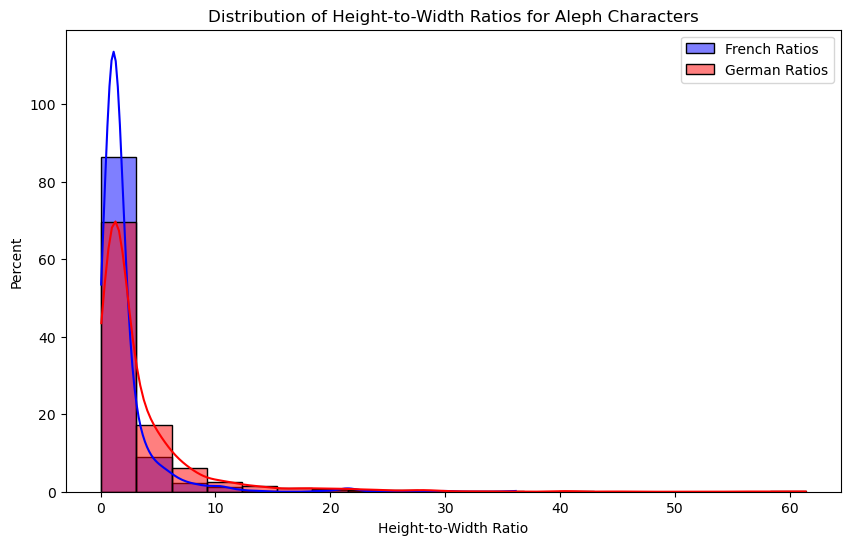

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate bin edges based on the range of both datasets
combined_data = np.concatenate([ratios_french, ratios_german])
bin_edges = np.histogram_bin_edges(combined_data, bins=20)

# Plot histograms with aligned bins
plt.figure(figsize=(10, 6))
sns.histplot(ratios_french, bins=bin_edges, color='blue', alpha=0.5, kde=True, stat="percent", label='French Ratios')
sns.histplot(ratios_german, bins=bin_edges, color='red', alpha=0.5, kde=True, stat="percent", label='German Ratios')
plt.title('Distribution of Height-to-Width Ratios for Aleph Characters')
plt.ylabel('Percent')
plt.xlabel('Height-to-Width Ratio')
plt.legend()
plt.savefig("figures/distribution_aligned_aleph.jpg", format="jpg", dpi=600)
plt.show()




This visualization compares the distribution of height-to-width ratios between French and German styles.
The kernel density estimate (KDE) overlay provides a smoothed outline of each distribution.

In [11]:
# Summary Statistics
mean_french = np.mean(ratios_french)
mean_german = np.mean(ratios_german)
std_french = np.std(ratios_french, ddof=1)
std_german = np.std(ratios_german, ddof=1)
n_french = len(ratios_french)
n_german = len(ratios_german)

print("French: Mean =", mean_french, ", Std Dev =", std_french, ", Count =", n_french)
print("German: Mean =", mean_german, ", Std Dev =", std_german, ", Count =", n_german)


French: Mean = 2.0273046016081055 , Std Dev = 2.972385286283692 , Count = 825
German: Mean = 3.377218445485786 , Std Dev = 5.05226048126305 , Count = 2073


These statistics provide an overview of each sample's distribution. 
They are useful for understanding central tendency (mean) and variability (standard deviation).

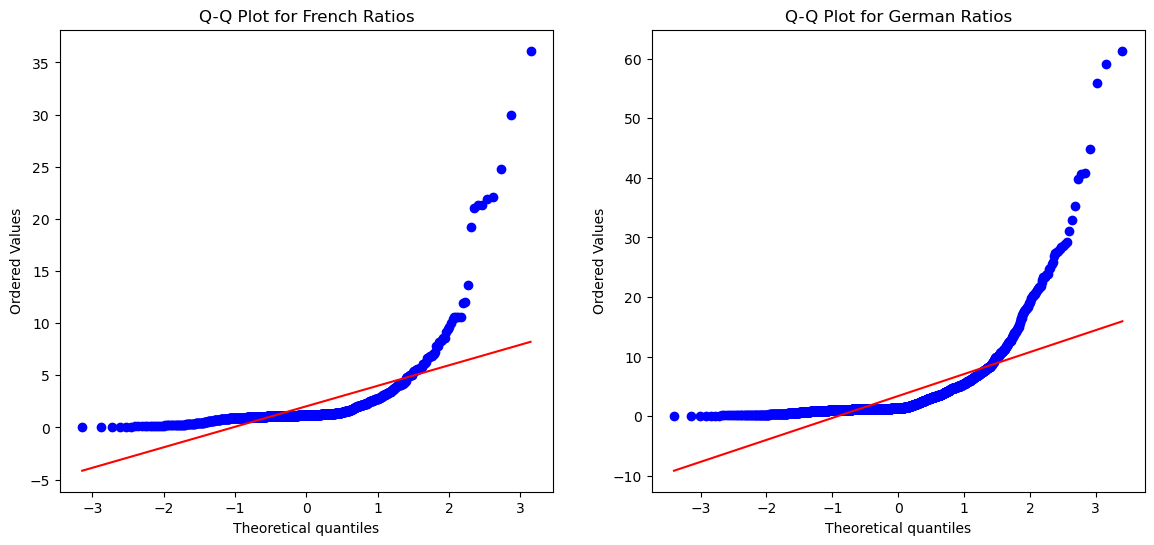

Levene’s Test for Equal Variance: p-value = 1.3861943494012823e-11


In [12]:
# Checking Assumptions for the T-Test
# The t-test assumes that both samples are normally distributed and have equal variances.
# We can use a visual Q-Q plot for normality and Levene’s test for equal variances.

import scipy.stats as stats

# Q-Q plot for normality check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
stats.probplot(ratios_french, dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot for French Ratios')
stats.probplot(ratios_german, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot for German Ratios')

# Save the figure as a JPG image
plt.savefig('figures/q-q_aleph.jpg', format='jpg', dpi=600)

plt.show()

# Variance Equality Test
levene_test = stats.levene(ratios_french, ratios_german)
print("Levene’s Test for Equal Variance: p-value =", levene_test.pvalue)


Q-Q plots visually assess the normality of each distribution. If the points follow the line closely, normality is likely.
Levene’s test checks if the variances are equal. A high p-value suggests we cannot reject the null hypothesis of equal variances.

In [13]:
# Applying the T-Test
t_stat, p_value = ttest_ind(ratios_french, ratios_german, equal_var=levene_test.pvalue > 0.05)
print("T-Test: t-statistic =", t_stat, ", p-value =", p_value)


T-Test: t-statistic = -8.896733958252133 , p-value = 1.0799754529346481e-18


The t-test examines if there is a statistically significant difference in the height-to-width ratio means between the two styles.
The p-value helps decide whether to reject the null hypothesis (that the means are equal).

In [14]:
# Interpretation of Results
if p_value < 0.05:
    print("The t-test indicates a significant difference in height-to-width ratios between French and German styles.")
else:
    print("The t-test does not indicate a significant difference in height-to-width ratios between German and French styles.")


The t-test indicates a significant difference in height-to-width ratios between French and German styles.


## The Shin Letter

* Name: Shin (ש)
* Category id: 4

In [6]:
category_id = 4
category_name = CATEGORIES[category_id - 1]

In [8]:
# Get the boxes of Shin for Both German and French
boxes_french = get_boxes(annotations_path, category_id, french_ids)
boxes_german = get_boxes(annotations_path, category_id, german_ids)

# Calculate the ratios for each style
ratios_french = calculate_ratios(boxes_french)
ratios_german = calculate_ratios(boxes_german)

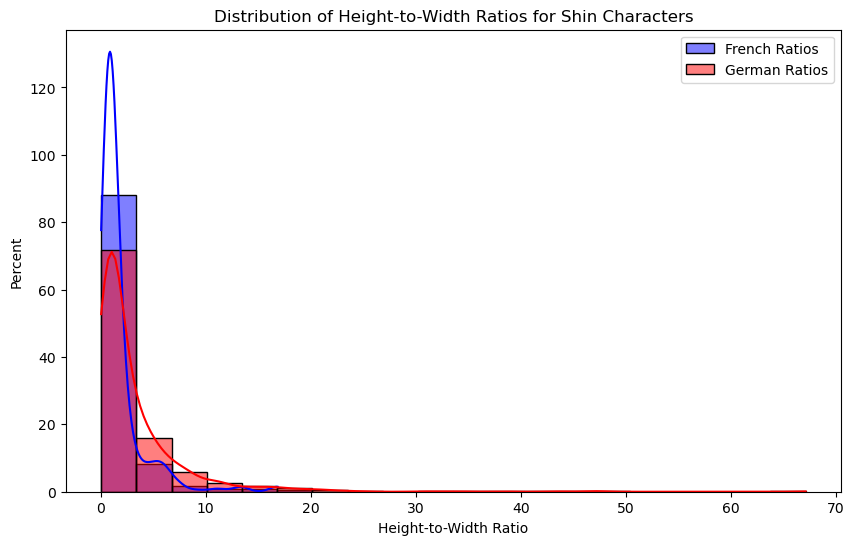

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate bin edges based on the range of both datasets
combined_data = np.concatenate([ratios_french, ratios_german])
bin_edges = np.histogram_bin_edges(combined_data, bins=20)

# Plot histograms with aligned bins
plt.figure(figsize=(10, 6))
sns.histplot(ratios_french, bins=bin_edges, color='blue', alpha=0.5, kde=True, stat="percent", label='French Ratios')
sns.histplot(ratios_german, bins=bin_edges, color='red', alpha=0.5, kde=True, stat="percent", label='German Ratios')
plt.title('Distribution of Height-to-Width Ratios for Shin Characters')
plt.ylabel('Percent')
plt.xlabel('Height-to-Width Ratio')
plt.legend()
plt.savefig("figures/distribution_aligned_shin.jpg", format="jpg", dpi=600)
plt.show()



This visualization compares the distribution of height-to-width ratios between French and German styles.
The kernel density estimate (KDE) overlay provides a smoothed outline of each distribution.

In [10]:
# Summary Statistics
mean_french = np.mean(ratios_french)
mean_german = np.mean(ratios_german)
std_french = np.std(ratios_french, ddof=1)
std_german = np.std(ratios_german, ddof=1)
n_french = len(ratios_french)
n_german = len(ratios_german)

print("French: Mean =", mean_french, ", Std Dev =", std_french, ", Count =", n_french)
print("German: Mean =", mean_german, ", Std Dev =", std_german, ", Count =", n_german)


French: Mean = 1.7694118571687647 , Std Dev = 2.3778305709922574 , Count = 375
German: Mean = 3.1839857278317716 , Std Dev = 4.827032323740292 , Count = 1281


These statistics provide an overview of each sample's distribution. 
They are useful for understanding central tendency (mean) and variability (standard deviation).

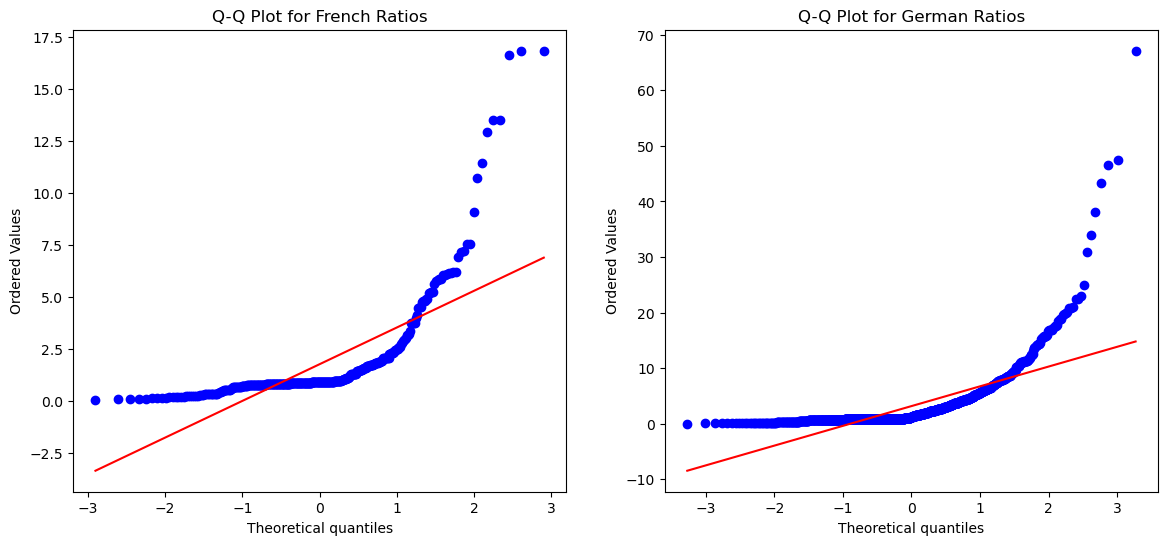

Levene’s Test for Equal Variance: p-value = 9.261771920639226e-08


In [11]:
# Checking Assumptions for the T-Test
# The t-test assumes that both samples are normally distributed and have equal variances.
# We can use a visual Q-Q plot for normality and Levene’s test for equal variances.

import scipy.stats as stats

# Q-Q plot for normality check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
stats.probplot(ratios_french, dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot for French Ratios')
stats.probplot(ratios_german, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot for German Ratios')

# Save the figure as a JPG image
plt.savefig('figures/q-q_shin.jpg', format='jpg', dpi=600)

plt.show()

# Variance Equality Test
levene_test = stats.levene(ratios_french, ratios_german)
print("Levene’s Test for Equal Variance: p-value =", levene_test.pvalue)


Q-Q plots visually assess the normality of each distribution. If the points follow the line closely, normality is likely.
Levene’s test checks if the variances are equal. A high p-value suggests we cannot reject the null hypothesis of equal variances.

In [12]:
# Applying the T-Test
t_stat, p_value = ttest_ind(ratios_french, ratios_german, equal_var=levene_test.pvalue > 0.05)
print("T-Test: t-statistic =", t_stat, ", p-value =", p_value)


T-Test: t-statistic = -7.755702287180964 , p-value = 1.785980651273833e-14


The t-test examines if there is a statistically significant difference in the height-to-width ratio means between the two styles.
The p-value helps decide whether to reject the null hypothesis (that the means are equal).

In [13]:
# Interpretation of Results
if p_value < 0.05:
    print("The t-test indicates a significant difference in height-to-width ratios between French and German styles.")
else:
    print("The t-test does not indicate a significant difference in height-to-width ratios between German and French styles.")


The t-test indicates a significant difference in height-to-width ratios between French and German styles.


## The Mem Letter

* Name: Mem (מ)
* Category id: 3

In [21]:
category_id = 3
category_name = CATEGORIES[category_id - 1]

In [23]:
# Get the boxes of Mem for Both German and French
boxes_french = get_boxes(annotations_path, category_id, french_ids)
boxes_german = get_boxes(annotations_path, category_id, german_ids)

# Calculate the ratios for each style
ratios_french = calculate_ratios(boxes_french)
ratios_german = calculate_ratios(boxes_german)

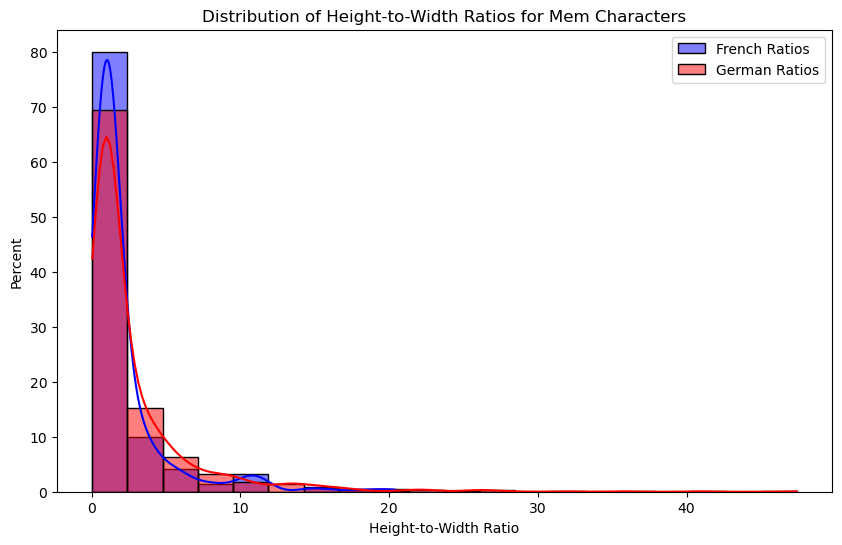

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate bin edges based on the range of both datasets
combined_data = np.concatenate([ratios_french, ratios_german])
bin_edges = np.histogram_bin_edges(combined_data, bins=20)

# Plot histograms with aligned bins
plt.figure(figsize=(10, 6))
sns.histplot(ratios_french, bins=bin_edges, color='blue', alpha=0.5, kde=True, stat="percent", label='French Ratios')
sns.histplot(ratios_german, bins=bin_edges, color='red', alpha=0.5, kde=True, stat="percent", label='German Ratios')
plt.title('Distribution of Height-to-Width Ratios for Mem Characters')
plt.ylabel('Percent')
plt.xlabel('Height-to-Width Ratio')
plt.legend()
plt.savefig("figures/distribution_aligned_mem.jpg", format="jpg", dpi=600)
plt.show()



This visualization compares the distribution of height-to-width ratios between French and German styles.
The kernel density estimate (KDE) overlay provides a smoothed outline of each distribution.

In [25]:
# Summary Statistics
mean_french = np.mean(ratios_french)
mean_german = np.mean(ratios_german)
std_french = np.std(ratios_french, ddof=1)
std_german = np.std(ratios_german, ddof=1)
n_french = len(ratios_french)
n_german = len(ratios_german)

print("French: Mean =", mean_french, ", Std Dev =", std_french, ", Count =", n_french)
print("German: Mean =", mean_german, ", Std Dev =", std_german, ", Count =", n_german)


French: Mean = 2.1193782095652107 , Std Dev = 2.8716266590350794 , Count = 415
German: Mean = 2.7941861076761203 , Std Dev = 4.127973733901523 , Count = 1480


These statistics provide an overview of each sample's distribution. 
They are useful for understanding central tendency (mean) and variability (standard deviation).

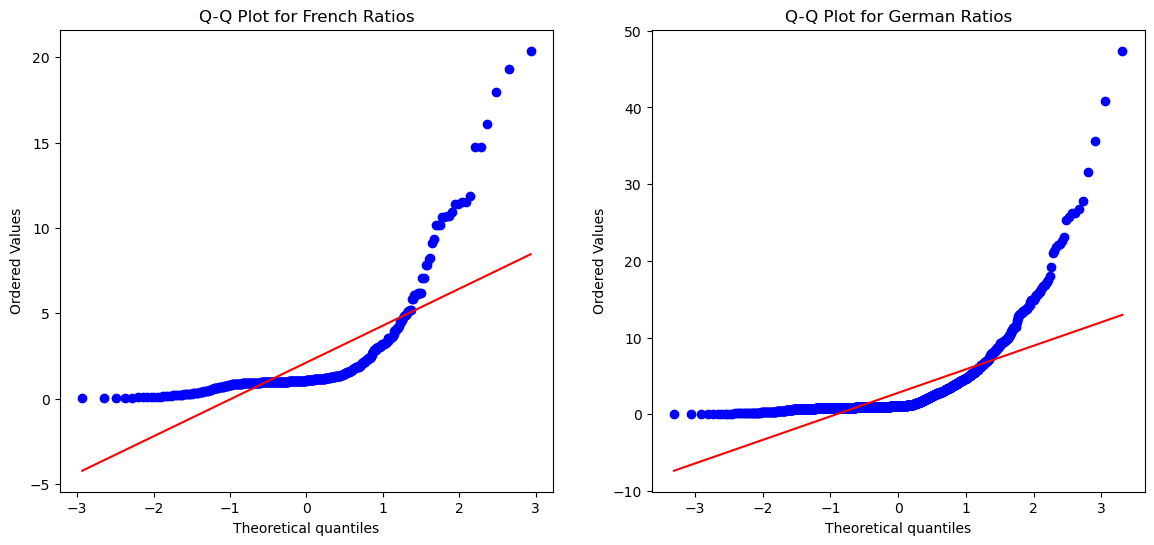

Levene’s Test for Equal Variance: p-value = 0.0018547658925179148


In [26]:
# Checking Assumptions for the T-Test
# The t-test assumes that both samples are normally distributed and have equal variances.
# We can use a visual Q-Q plot for normality and Levene’s test for equal variances.

import scipy.stats as stats

# Q-Q plot for normality check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
stats.probplot(ratios_french, dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot for French Ratios')
stats.probplot(ratios_german, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot for German Ratios')

# Save the figure as a JPG image
plt.savefig('figures/q-q_mem.jpg', format='jpg', dpi=600)

plt.show()

# Variance Equality Test
levene_test = stats.levene(ratios_french, ratios_german)
print("Levene’s Test for Equal Variance: p-value =", levene_test.pvalue)


Q-Q plots visually assess the normality of each distribution. If the points follow the line closely, normality is likely.
Levene’s test checks if the variances are equal. A high p-value suggests we cannot reject the null hypothesis of equal variances.

In [27]:
# Applying the T-Test
t_stat, p_value = ttest_ind(ratios_french, ratios_german, equal_var=levene_test.pvalue > 0.05)
print("T-Test: t-statistic =", t_stat, ", p-value =", p_value)


T-Test: t-statistic = -3.8091268169983974 , p-value = 0.00014847404279670848


The t-test examines if there is a statistically significant difference in the height-to-width ratio means between the two styles.
The p-value helps decide whether to reject the null hypothesis (that the means are equal).

In [28]:
# Interpretation of Results
if p_value < 0.05:
    print("The t-test indicates a significant difference in height-to-width ratios between French and German styles.")
else:
    print("The t-test does not indicate a significant difference in height-to-width ratios between German and French styles.")


The t-test indicates a significant difference in height-to-width ratios between French and German styles.


## The He Letter

* Name: He (ה)
* Category id: 2

In [29]:
category_id = 2
category_name = CATEGORIES[category_id - 1]

In [30]:
# Get the boxes of Mem for Both German and French
boxes_french = get_boxes(annotations_path, category_id, french_ids)
boxes_german = get_boxes(annotations_path, category_id, german_ids)

# Calculate the ratios for each style
ratios_french = calculate_ratios(boxes_french)
ratios_german = calculate_ratios(boxes_german)

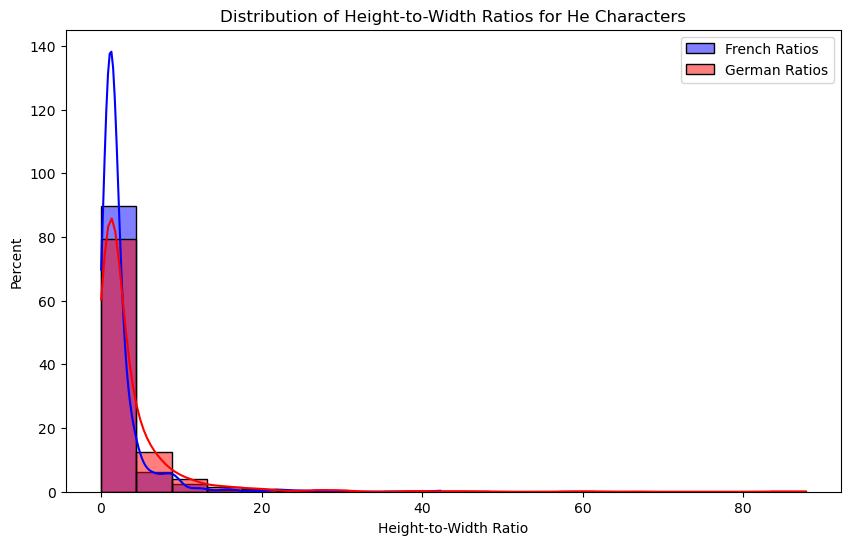

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate bin edges based on the range of both datasets
combined_data = np.concatenate([ratios_french, ratios_german])
bin_edges = np.histogram_bin_edges(combined_data, bins=20)

# Plot histograms with aligned bins
plt.figure(figsize=(10, 6))
sns.histplot(ratios_french, bins=bin_edges, color='blue', alpha=0.5, kde=True, stat="percent", label='French Ratios')
sns.histplot(ratios_german, bins=bin_edges, color='red', alpha=0.5, kde=True, stat="percent", label='German Ratios')
plt.title('Distribution of Height-to-Width Ratios for He Characters')
plt.ylabel('Percent')
plt.xlabel('Height-to-Width Ratio')
plt.legend()
plt.savefig("figures/distribution_aligned_he.jpg", format="jpg", dpi=600)
plt.show()


This visualization compares the distribution of height-to-width ratios between French and German styles.
The kernel density estimate (KDE) overlay provides a smoothed outline of each distribution.

In [33]:
# Summary Statistics
mean_french = np.mean(ratios_french)
mean_german = np.mean(ratios_german)
std_french = np.std(ratios_french, ddof=1)
std_german = np.std(ratios_german, ddof=1)
n_french = len(ratios_french)
n_german = len(ratios_german)

print("French: Mean =", mean_french, ", Std Dev =", std_french, ", Count =", n_french)
print("German: Mean =", mean_german, ", Std Dev =", std_german, ", Count =", n_german)


French: Mean = 2.327825667977895 , Std Dev = 3.365869119717628 , Count = 651
German: Mean = 3.472823343215115 , Std Dev = 6.024599740891718 , Count = 1894


These statistics provide an overview of each sample's distribution. 
They are useful for understanding central tendency (mean) and variability (standard deviation).

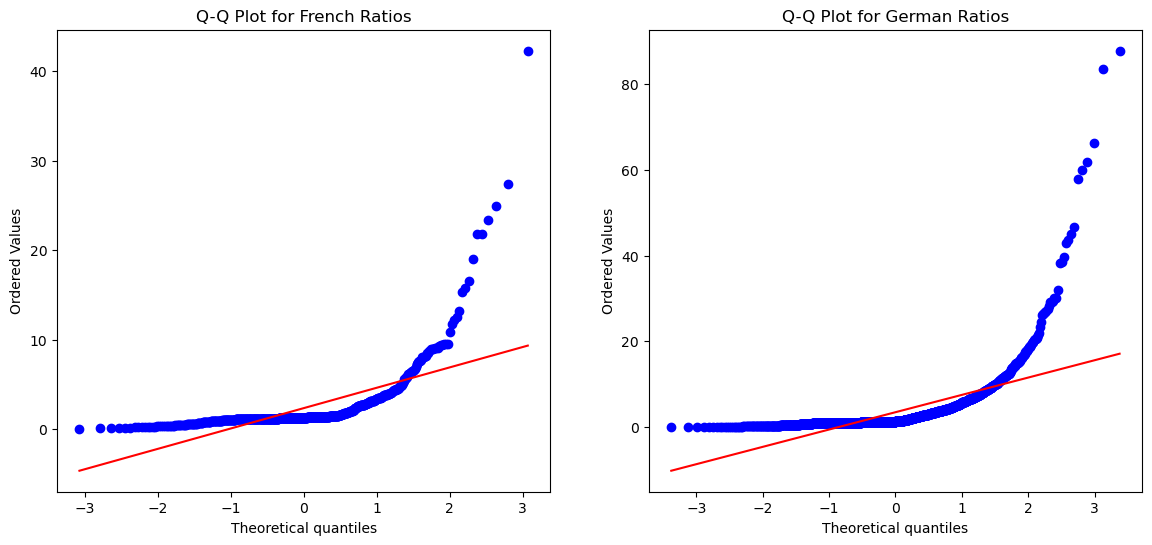

Levene’s Test for Equal Variance: p-value = 8.660776162023688e-07


In [34]:
# Checking Assumptions for the T-Test
# The t-test assumes that both samples are normally distributed and have equal variances.
# We can use a visual Q-Q plot for normality and Levene’s test for equal variances.

import scipy.stats as stats

# Q-Q plot for normality check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
stats.probplot(ratios_french, dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot for French Ratios')
stats.probplot(ratios_german, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot for German Ratios')

# Save the figure as a JPG image
plt.savefig('figures/q-q_he.jpg', format='jpg', dpi=600)

plt.show()

# Variance Equality Test
levene_test = stats.levene(ratios_french, ratios_german)
print("Levene’s Test for Equal Variance: p-value =", levene_test.pvalue)


Q-Q plots visually assess the normality of each distribution. If the points follow the line closely, normality is likely.
Levene’s test checks if the variances are equal. A high p-value suggests we cannot reject the null hypothesis of equal variances.

In [35]:
# Applying the T-Test
t_stat, p_value = ttest_ind(ratios_french, ratios_german, equal_var=levene_test.pvalue > 0.05)
print("T-Test: t-statistic =", t_stat, ", p-value =", p_value)


T-Test: t-statistic = -5.98776886397455 , p-value = 2.5101207895748743e-09


The t-test examines if there is a statistically significant difference in the height-to-width ratio means between the two styles.
The p-value helps decide whether to reject the null hypothesis (that the means are equal).

In [36]:
# Interpretation of Results
if p_value < 0.05:
    print("The t-test indicates a significant difference in height-to-width ratios between French and German styles.")
else:
    print("The t-test does not indicate a significant difference in height-to-width ratios between German and French styles.")


The t-test indicates a significant difference in height-to-width ratios between French and German styles.


## The Mem Sofit Letter

* Name: Mem Sofit (ם)
* Category id: 5

In [37]:
category_id = 5
category_name = CATEGORIES[category_id - 1]

In [38]:
# Get the boxes of Mem for Both German and French
boxes_french = get_boxes(annotations_path, category_id, french_ids)
boxes_german = get_boxes(annotations_path, category_id, german_ids)

# Calculate the ratios for each style
ratios_french = calculate_ratios(boxes_french)
ratios_german = calculate_ratios(boxes_german)

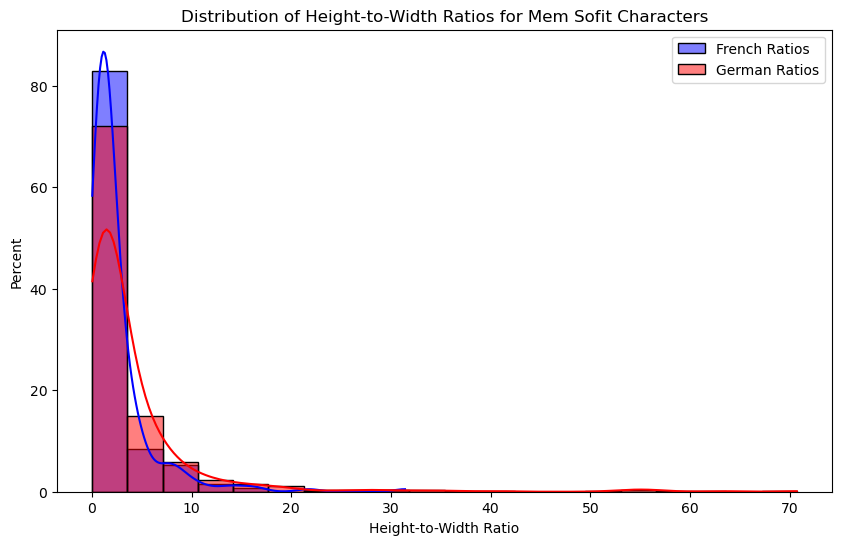

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate bin edges based on the range of both datasets
combined_data = np.concatenate([ratios_french, ratios_german])
bin_edges = np.histogram_bin_edges(combined_data, bins=20)

# Plot histograms with aligned bins
plt.figure(figsize=(10, 6))
sns.histplot(ratios_french, bins=bin_edges, color='blue', alpha=0.5, kde=True, stat="percent", label='French Ratios')
sns.histplot(ratios_german, bins=bin_edges, color='red', alpha=0.5, kde=True, stat="percent", label='German Ratios')
plt.title('Distribution of Height-to-Width Ratios for Mem Sofit Characters')
plt.ylabel('Percent')
plt.xlabel('Height-to-Width Ratio')
plt.legend()
plt.savefig("figures/distribution_aligned_mem_sofit.jpg", format="jpg", dpi=600)
plt.show()


# Set y-axis to show percentage ticks
#plt.yticks(np.arange(0, 25, 5))  # Adjust range and interval as needed


This visualization compares the distribution of height-to-width ratios between French and German styles.
The kernel density estimate (KDE) overlay provides a smoothed outline of each distribution.

In [40]:
# Summary Statistics
mean_french = np.mean(ratios_french)
mean_german = np.mean(ratios_german)
std_french = np.std(ratios_french, ddof=1)
std_german = np.std(ratios_german, ddof=1)
n_french = len(ratios_french)
n_german = len(ratios_german)

print("French: Mean =", mean_french, ", Std Dev =", std_french, ", Count =", n_french)
print("German: Mean =", mean_german, ", Std Dev =", std_german, ", Count =", n_german)


French: Mean = 2.4734950496581907 , Std Dev = 3.4418188868561947 , Count = 247
German: Mean = 3.9093174128042314 , Std Dev = 7.140554714484081 , Count = 727


These statistics provide an overview of each sample's distribution. 
They are useful for understanding central tendency (mean) and variability (standard deviation).

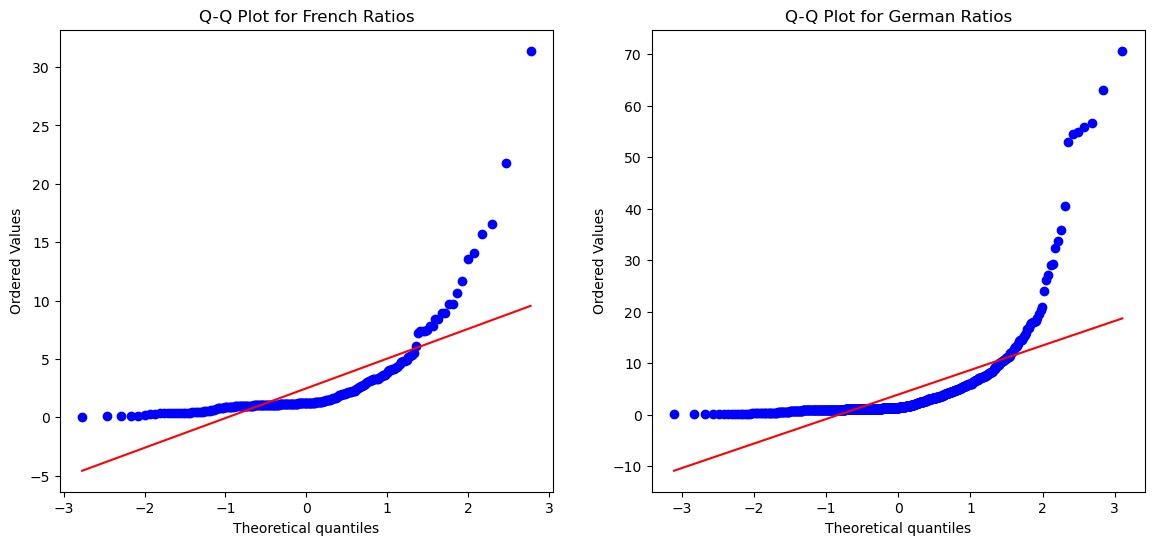

Levene’s Test for Equal Variance: p-value = 0.0036247401713062825


In [41]:
# Checking Assumptions for the T-Test
# The t-test assumes that both samples are normally distributed and have equal variances.
# We can use a visual Q-Q plot for normality and Levene’s test for equal variances.

import scipy.stats as stats

# Q-Q plot for normality check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
stats.probplot(ratios_french, dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot for French Ratios')
stats.probplot(ratios_german, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot for German Ratios')

# Save the figure as a JPG image
plt.savefig('figures/q-q_mem_sofit.jpg', format='jpg', dpi=600)

plt.show()

# Variance Equality Test
levene_test = stats.levene(ratios_french, ratios_german)
print("Levene’s Test for Equal Variance: p-value =", levene_test.pvalue)


Q-Q plots visually assess the normality of each distribution. If the points follow the line closely, normality is likely.
Levene’s test checks if the variances are equal. A high p-value suggests we cannot reject the null hypothesis of equal variances.

In [42]:
# Applying the T-Test
t_stat, p_value = ttest_ind(ratios_french, ratios_german, equal_var=levene_test.pvalue > 0.05)
print("T-Test: t-statistic =", t_stat, ", p-value =", p_value)


T-Test: t-statistic = -4.178174316675893 , p-value = 3.2370053502681835e-05


The t-test examines if there is a statistically significant difference in the height-to-width ratio means between the two styles.
The p-value helps decide whether to reject the null hypothesis (that the means are equal).

In [43]:
# Interpretation of Results
if p_value < 0.05:
    print("The t-test indicates a significant difference in height-to-width ratios between French and German styles.")
else:
    print("The t-test does not indicate a significant difference in height-to-width ratios between German and French styles.")


The t-test indicates a significant difference in height-to-width ratios between French and German styles.


## The Tav Letter

* Name: Tav (ת)
* Category id: 6

In [44]:
category_id = 6
category_name = CATEGORIES[category_id - 1]

In [45]:
# Get the boxes of Tav for Both German and French
boxes_french = get_boxes(annotations_path, category_id, french_ids)
boxes_german = get_boxes(annotations_path, category_id, german_ids)

# Calculate the ratios for each style
ratios_french = calculate_ratios(boxes_french)
ratios_german = calculate_ratios(boxes_german)

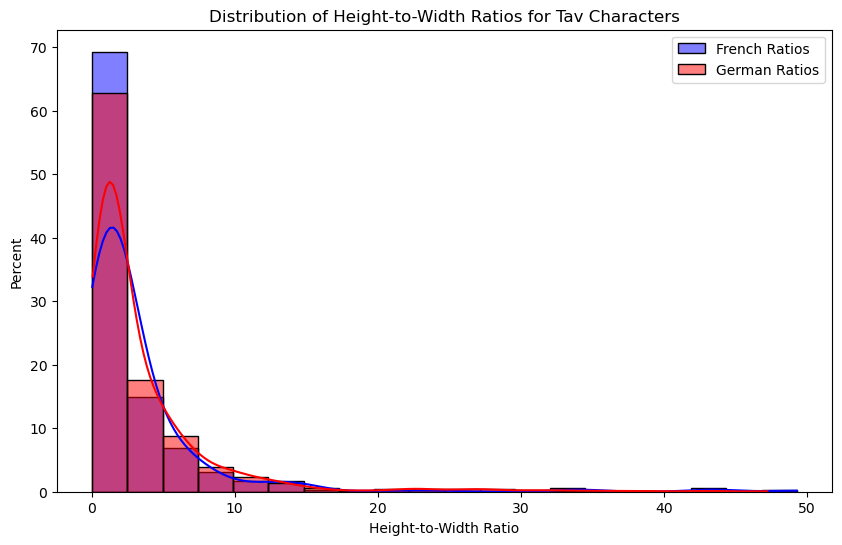

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate bin edges based on the range of both datasets
combined_data = np.concatenate([ratios_french, ratios_german])
bin_edges = np.histogram_bin_edges(combined_data, bins=20)

# Plot histograms with aligned bins
plt.figure(figsize=(10, 6))
sns.histplot(ratios_french, bins=bin_edges, color='blue', alpha=0.5, kde=True, stat="percent", label='French Ratios')
sns.histplot(ratios_german, bins=bin_edges, color='red', alpha=0.5, kde=True, stat="percent", label='German Ratios')
plt.title('Distribution of Height-to-Width Ratios for Tav Characters')
plt.ylabel('Percent')
plt.xlabel('Height-to-Width Ratio')
plt.legend()
plt.savefig("figures/distribution_aligned_mem_sofit.jpg", format="jpg", dpi=600)
plt.show()


This visualization compares the distribution of height-to-width ratios between French and German styles.
The kernel density estimate (KDE) overlay provides a smoothed outline of each distribution.

In [47]:
# Summary Statistics
mean_french = np.mean(ratios_french)
mean_german = np.mean(ratios_german)
std_french = np.std(ratios_french, ddof=1)
std_german = np.std(ratios_german, ddof=1)
n_french = len(ratios_french)
n_german = len(ratios_german)

print("French: Mean =", mean_french, ", Std Dev =", std_french, ", Count =", n_french)
print("German: Mean =", mean_german, ", Std Dev =", std_german, ", Count =", n_german)


French: Mean = 3.2253284194907472 , Std Dev = 5.59087553847384 , Count = 348
German: Mean = 3.511935913842513 , Std Dev = 5.18583108289831 , Count = 1137


These statistics provide an overview of each sample's distribution. 
They are useful for understanding central tendency (mean) and variability (standard deviation).

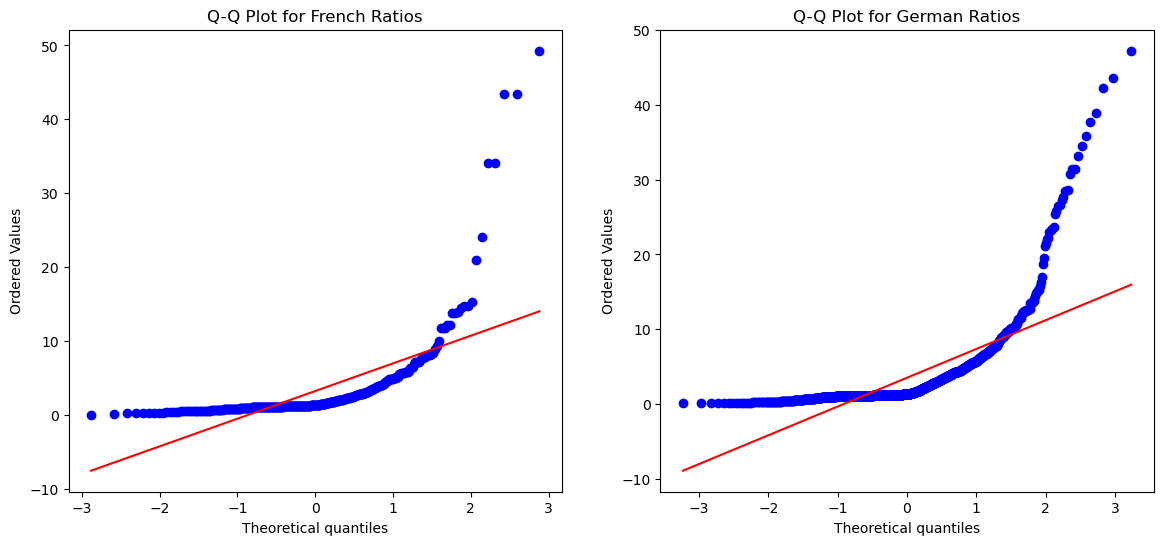

Levene’s Test for Equal Variance: p-value = 0.4444124013750217


In [48]:
# Checking Assumptions for the T-Test
# The t-test assumes that both samples are normally distributed and have equal variances.
# We can use a visual Q-Q plot for normality and Levene’s test for equal variances.

import scipy.stats as stats

# Q-Q plot for normality check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
stats.probplot(ratios_french, dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot for French Ratios')
stats.probplot(ratios_german, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot for German Ratios')

# Save the figure as a JPG image
plt.savefig('figures/q-q_mem_sofit.jpg', format='jpg', dpi=600)

plt.show()

# Variance Equality Test
levene_test = stats.levene(ratios_french, ratios_german)
print("Levene’s Test for Equal Variance: p-value =", levene_test.pvalue)


Q-Q plots visually assess the normality of each distribution. If the points follow the line closely, normality is likely.
Levene’s test checks if the variances are equal. A high p-value suggests we cannot reject the null hypothesis of equal variances.

In [49]:
# Applying the T-Test
t_stat, p_value = ttest_ind(ratios_french, ratios_german, equal_var=levene_test.pvalue > 0.05)
print("T-Test: t-statistic =", t_stat, ", p-value =", p_value)


T-Test: t-statistic = -0.8854857530582045 , p-value = 0.37603825158593507


The t-test examines if there is a statistically significant difference in the height-to-width ratio means between the two styles.
The p-value helps decide whether to reject the null hypothesis (that the means are equal).

In [50]:
# Interpretation of Results
if p_value < 0.05:
    print("The t-test indicates a significant difference in height-to-width ratios between French and German styles.")
else:
    print("The t-test does not indicate a significant difference in height-to-width ratios between German and French styles.")


The t-test does not indicate a significant difference in height-to-width ratios between German and French styles.


## Summary:

This notebook walks through calculating ratios, visualizing distributions, and applying a t-test for statistical comparison.
The Q-Q plot and Levene’s test ensure the assumptions for a t-test are met. 
If the p-value is below 0.05, the ratio distributions are considered statistically different.